Demo - Classification with Multilayer Perceptron

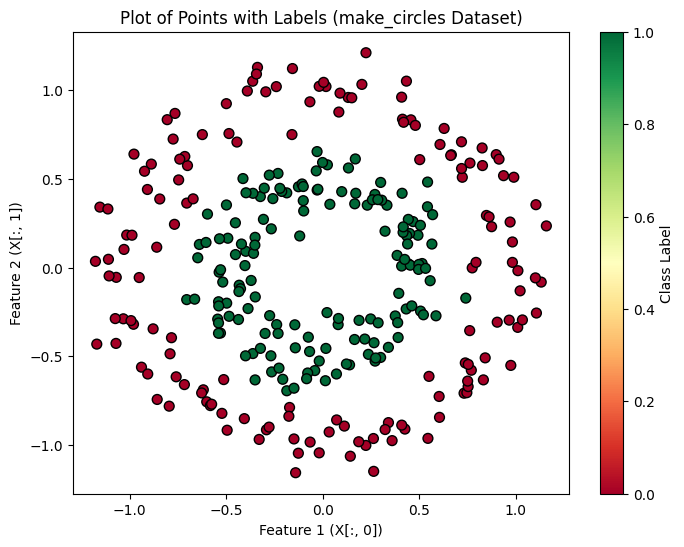

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate synthetic data (circles)
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# Plot the points with their labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (X[:, 0])')
plt.ylabel('Feature 2 (X[:, 1])')
plt.title('Plot of Points with Labels (make_circles Dataset)')
plt.colorbar(label='Class Label')
plt.show()

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.neural_network import MLPClassifier 
import ipywidgets as widgets 
from IPython.display import display 
from ipywidgets import interactive

# Function to update and display the plot
def update_plot(hidden_layer_size):
    # Generate synthetic data (circle)
    X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

    # Create a multi-layer perceptron (MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                        activation='relu', max_iter=3000, random_state=1)
    clf.fit(X, y)

    # Create a grid of points for visualization
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    # Predict class labels for the grid points
    Z = clf.predict(grid_points).reshape(X_plane.shape)

    # Clear previous plot
    plt.clf()
    plt.figure(figsize=(6, 6))

    # Plot the decision boundary
    plt.contourf(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha=0.6)

    # Plot the original data points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", edgecolor='k')

    # Labels and legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary (Hidden Layer Size = {hidden_layer_size})')
    plt.legend()
    plt.show()

# Create a slider for hidden layer size
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size')

# Create an interactive widget
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

# Display the widgets
display(interactive_plot)


interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…